# Homework 4 

1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand/historic) for 7 days (Include each day of the week)

1. Create two bar graphs of the power consumption per hour.

    * One bar graph has 24 bars showing the average consumption
    * One bar graph has 7x24 bars showing the average demand 

1. Your solution should be committed in your Week04 folder.

Graphs must have appropriate labels and there should not be anything extra cluttering. 

In [1]:
!python --version

Python 3.9.7


In [3]:
import pandas as pd

In [6]:
pd.__version__

'1.3.4'

In [7]:
df = pd.read_csv("/Users/dakshintwala/Downloads/RollingSystemDemand_20220301_2116.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, VD to FTR
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HDR                    2001 non-null   int64  
 1   ROLLING SYSTEM DEMAND  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 46.9+ KB


In [9]:
df.head()

,HDR,ROLLING SYSTEM DEMAND
VD,20200101000000,27007.0
VD,20200101000500,27044.0
VD,20200101001000,27095.0
VD,20200101001500,27100.0
VD,20200101002000,27160.0


### Separting columns

In [10]:
df['time']=df['HDR']

In [11]:
df['time']=df['time'].astype(str).str[-6:]

In [12]:
df['HDR']=df['HDR'].astype(str).str[0:8]

In [13]:
df['hours']= df['time'].astype(str).str[:2]

In [14]:
df['date'] = df['HDR'].astype(str).str[-2:]

In [15]:
df.tail()

,HDR,ROLLING SYSTEM DEMAND,time,hours,date
VD,20200107,28794.0,222000,22,07
VD,20200107,28389.0,222500,22,07
VD,20200107,28385.0,223000,22,07
VD,20200107,28315.0,223500,22,07
FTR,2000,NaN,2000,20,00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, VD to FTR
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HDR                    2001 non-null   object 
 1   ROLLING SYSTEM DEMAND  2000 non-null   float64
 2   time                   2001 non-null   object 
 3   hours                  2001 non-null   object 
 4   date                   2001 non-null   object 
dtypes: float64(1), object(4)
memory usage: 93.8+ KB


In [17]:
import matplotlib.pyplot as plt

### One bar graph has 24 bars showing the average consumption

In [18]:
groupedby_hours = df.groupby(by='hours')
groupedby_hours

In [19]:
hourly_avg = []
hours=[]
for key, values in groupedby_hours:
    hours.append(key)
    hourly_avg.append(values['ROLLING SYSTEM DEMAND'].mean())
print(hours)
print(hourly_avg)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
[25946.809523809523, 25854.97619047619, 25440.47619047619, 24971.29761904762, 24603.404761904763, 24828.464285714286, 27303.79761904762, 30144.27380952381, 32284.89285714286, 33938.75, 34820.32142857143, 35319.94047619047, 35730.26190476191, 35925.09523809524, 36102.65476190476, 36873.45238095238, 39327.04761904762, 40924.583333333336, 39984.95238095238, 38165.07142857143, 35544.65476190476, 32394.60714285714, 29140.625, 26376.069444444445]


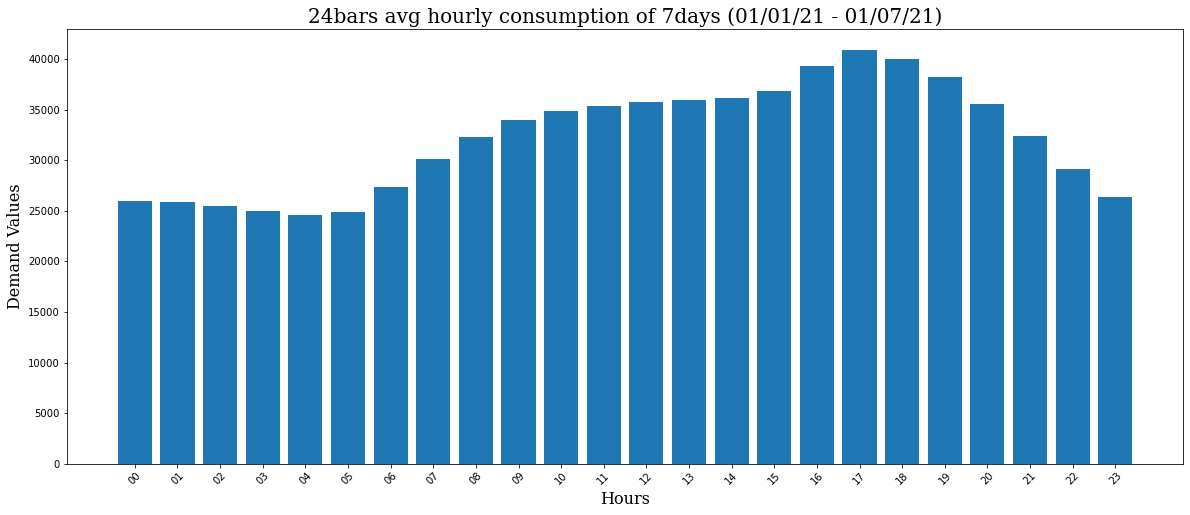

In [20]:
font={'size': 20, 'family':'serif'}
font1={'size': 16, 'family':'serif'}


fig = plt.figure(figsize=(20,8))
plt.bar(hours, hourly_avg)
plt.xlabel("Hours", fontdict=font1)
plt.ylabel("Demand Values", fontdict=font1)
plt.xticks(rotation = 45)
plt.title('24bars avg hourly consumption of 7days (01/01/21 - 01/07/21)', fontdict=font )
plt.show()

### One bar graph has 7x24 bars showing the average demand

In [36]:
xax = list(range(168))

In [64]:
groupedby_days_hours = df.groupby(['date'])
yax=[]
for key, values in groupedby_days:
    print(key)
    print(values.groupby('hours')['ROLLING SYSTEM DEMAND'].mean())
    yax.extend(values.groupby('hours')['ROLLING SYSTEM DEMAND'].mean())
    

00
hours
20   NaN
Name: ROLLING SYSTEM DEMAND, dtype: float64
01
hours
00    27339.083333
01    26886.416667
02    25677.500000
03    24936.583333
04    23858.500000
05    23881.750000
06    24822.166667
07    25178.083333
08    25810.916667
09    27900.666667
10    29974.916667
11    31388.416667
12    33039.416667
13    33556.500000
14    33936.250000
15    34720.750000
16    36567.000000
17    37749.750000
18    36410.833333
19    34800.000000
20    32782.750000
21    30426.333333
22    27870.333333
23    24594.833333
Name: ROLLING SYSTEM DEMAND, dtype: float64
02
hours
00    23890.166667
01    23791.166667
02    23924.750000
03    23934.750000
04    24399.833333
05    24692.000000
06    27589.500000
07    31446.416667
08    33822.833333
09    35100.166667
10    35759.500000
11    36337.333333
12    36946.083333
13    36881.833333
14    37067.250000
15    38020.083333
16    39894.916667
17    41159.916667
18    40178.250000
19    38275.000000
20    35366.333333
21    31799.250000
22

In [67]:
# for setting x-axis labels
name_hours=[]
for i in range(7):
    name_hours.extend(list(range(24)))


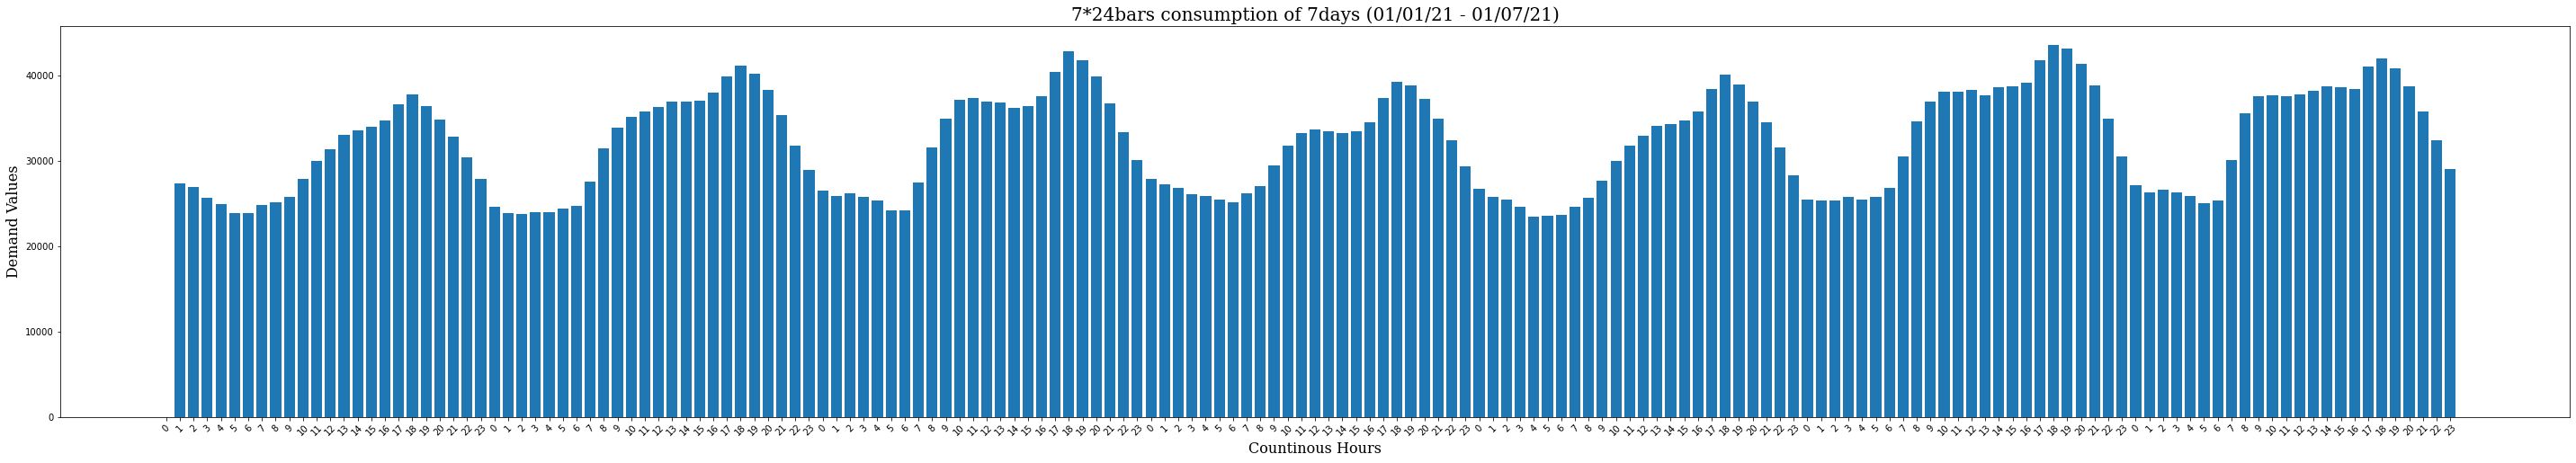

In [66]:

fig = plt.figure(figsize=(50,8))
plt.bar(xax, yax)
plt.xlabel("Countinous Hours", fontdict=font1)
plt.ylabel("Demand Values", fontdict=font1)
plt.xticks(xax, name_hours,rotation = 45)
plt.title('7*24bars consumption of 7days (01/01/21 - 01/07/21)', fontdict=font )
plt.show()